## Class for Fuzzy Sorting that contains functions:
    - Find Intersection
    - Fuzzy Sort (Recursive)
    - Partition
        - Partition Right
        - Partition Left
    - Sort Array


In [3]:
import random

class FuzzySort:
    def sort_array(self, A):
        self.fuzzy_sort(A, 0, len(A) - 1)
        return A
    
    def find_intersection(self, A, p, r):
        rand = random.randint(p, r)
        A[rand], A[r] = A[r], A[rand]
        a = A[r][0]
        b = A[r][1]
        for i in range (p, r):
            if A[i][0] <= b and A[i][1] >= a:
                if A[i][0] > a:
                    a = A[i][0]
                if A[i][1] < b:
                    b = A[i][1]
        return a, b
    
    def fuzzy_sort(self, A, p, r):
        if p < r:
            a, b = self.find_intersection(A, p, r)
            t = self.partition_right(A, p, r, a)
            q = self.partition_left(A, p, t, b)
            self.fuzzy_sort(A, p, q - 1)
            self.fuzzy_sort(A, t + 1, r)
            
    
    
    def partition_right(self, A, p, r, a):
        i = p - 1
        for j in range(p, r):
            if A[j][0] <= a:
                i += 1
                A[i], A[j] = A[j], A[i]
        A[i + 1], A[r] = A[r], A[i + 1]
        return i+1

    def partition_left(self, A, p, t, b):
        i = p - 1
        for j in range(p, t):
            if A[j][1] < b:
                i += 1
                A[i], A[j] = A[j], A[i]
        A[i + 1], A[t] = A[t], A[i + 1]
        return i+1
    
    

## Processing the Data and Generating the Fuzzy Sorted Output

In [4]:
import pandas as pd
def output(data):
    input_arr = data.to_numpy()
    input_arr = list(map(tuple, input_arr))
    fuzzy_sort = FuzzySort()
    output_arr = fuzzy_sort.sort_array(input_arr)
    return output_arr, input_arr

## Generate Random Values of n for comparision and to observe $O(nlogn)$ and $O(n)$ behaviour

In [5]:
import time
import matplotlib.pyplot as plt

def gen_run_times(n_values, A):
    execution_times = []
    n_list = []

    # iterate over n values
    for n in n_values:
        # generate random list of n integers
        arr = A[0:n]

        # time execution of fuzzy sort sort for arr for the current n_value
        start_time = time.time()
        fuzzy_sort = FuzzySort()
        output_arr = fuzzy_sort.sort_array(arr)
        end_time = time.time()
        execution_time = end_time - start_time
        
        # append execution time and n value to lists
        execution_times.append(execution_time)
        n_list.append(n)

    return execution_times, n_list
    

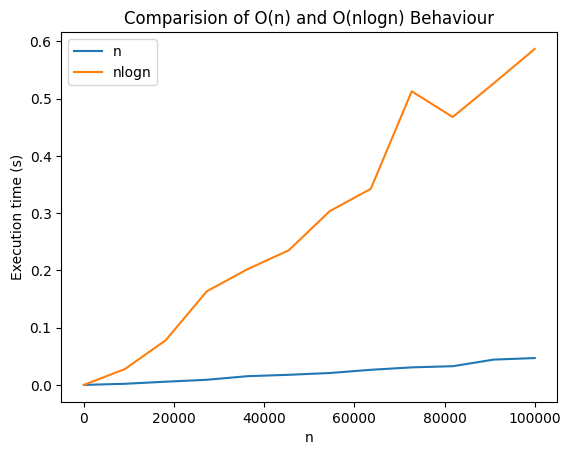

In [11]:
import pandas as pd
import time
import numpy as np


if __name__ == "__main__":
    
    n_values = np.linspace(1, 100000, num=12, dtype=int)
    
    ## All overlap
    all_data = pd.read_csv("all_overlap.txt", sep = " ", header = None)
    a_output_arr, a_input_arr = output(all_data)
    a_execution_times, a_n_list = gen_run_times(n_values, a_input_arr)
    print("The output array for all overlap is {}: ".format( a_output_arr))
    
    ## Small overlap
    small_data = pd.read_csv("small_overlap.txt", sep = " ", header = None)
    s_output_arr, s_input_arr = output(small_data)
    s_execution_times, s_n_list = gen_run_times(n_values, s_input_arr)
    
    plt.plot(a_n_list, a_execution_times, label = "n")
    plt.plot(s_n_list, s_execution_times, label="nlogn")
    plt.title('Comparision of O(n) and O(nlogn) Behaviour')
    plt.xlabel('n')
    plt.ylabel('Execution time (s)')
    plt.legend()
    plt.show()
    
    #(output_arr)